In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import SLI_functions as sli

In [3]:
from imp import reload

In [92]:
reload(sli)

<module 'SLI_functions' from '/Users/gkeramidas/Projects/SLIs/SLI_functions.py'>

In [79]:
plt.style.use('ggplot')
plt.rcParams['font.size'] = 30
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['axes.labelweight'] = 'heavy'
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] = 30
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['figure.titlesize'] = 30
plt.rcParams['text.usetex']=True

## Reading Data

In [117]:
props_df = pd.read_hdf('dump_20221115T193154.h5', key='propagations')
states_df = pd.read_hdf('dump_20221115T193154.h5', key='states')
targets_df = pd.read_hdf('dump_20221115T193154.h5', key='targets')

In [118]:
targets_df.head()

,id,target_name,norad_id,source_name,period,inclination,apogee,perigee,international_designator,origin_country_code,...,hbr_custom,position_uncertainty,is_hypothesis,target_lifecycle,archived,leolabs_only,catalog_edited,screening_volume,created_at,updated_at
0,5291260,UNKNOWN,87441.0,spacetrack-cdm,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,False,None,False,False,None,None,2020-10-20 19:46:10.053466,2022-07-13 20:15:32.628005
1,116917,UNKNOWN,82300.0,spacetrack-cdm,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,None,None,False,False,None,None,2021-05-21 21:39:50.918391,2022-07-13 20:01:02.307998
2,116918,UNKNOWN,81280.0,spacetrack-cdm,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,None,None,False,False,None,None,2021-05-23 07:11:12.497773,2022-07-13 20:01:02.311008
3,116919,UNKNOWN,83972.0,spacetrack-cdm,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,None,None,False,False,None,None,2021-05-23 21:26:45.701308,2022-07-13 20:01:02.314460
4,116921,UNKNOWN,81063.0,spacetrack-cdm,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,None,None,False,False,None,None,2021-05-24 07:11:11.408864,2022-07-13 20:01:02.320716


In [119]:
states_df.head()

,id,source,target_id,timestamp,propagation_begin_time,propagation_end_time,is_hypothesis,convergence_status,convergence_conditions,incorporated_tracklets,...,uncertainties_rmsVelocity,uncertainties_radialUncertainty,uncertainties_inTrackUncertainty,uncertainties_crossTrackUncertainty,position_x,position_y,position_z,velocity_x,velocity_y,velocity_z
0,3681176,leolabs,3,2022-11-07 06:05:22.213784,2022-11-06 06:05:22.213784,2022-11-14 06:05:22.213784,False,None,None,None,...,4.601013,544.204377,2032.827642,10710.701864,2.982674e+06,-5.654999e+05,6.513046e+06,5662.476460,-3878.664163,-2829.913561
1,3638624,leolabs,3,2022-10-27 05:54:01.506976,2022-10-26 05:54:01.506976,2022-11-03 05:54:01.506976,False,None,None,None,...,6.778290,781.551263,1913.143639,11361.897244,2.711532e+06,-1.044256e+06,6.518398e+06,4860.816177,-4988.120462,-2714.838853
2,3624296,leolabs,3,2022-10-22 19:49:43.945095,2022-10-21 19:49:43.945095,2022-10-29 19:49:43.945095,False,None,None,None,...,7.223720,2812.279387,1150.897453,8230.059261,-3.937772e+06,2.980284e+06,-5.167568e+06,-3105.164285,4494.802135,5089.747998
3,3680471,leolabs,4,2022-11-07 01:58:32.809586,2022-11-06 01:58:32.809586,2022-11-14 01:58:32.809586,False,None,None,None,...,0.566014,39.517366,814.823674,57.161070,9.046483e+05,-2.956819e+06,7.426763e+06,3552.696921,5866.441634,1727.905335
4,3672248,leolabs,4,2022-11-05 01:18:53.818307,2022-11-04 01:18:53.818307,2022-11-12 01:18:53.818307,False,None,None,None,...,0.139646,27.825604,197.187657,72.816345,1.041676e+06,-2.895750e+06,7.441386e+06,3298.391479,6012.860462,1700.492427


In [120]:
props_df.head()

,target_state_id,timestamp,position_x,position_y,position_z,velocity_x,velocity_y,velocity_z,covariance_xx,covariance_xy,covariance_xz,covariance_yy,covariance_yz,covariance_zz
0,3661210,1.667286e+09,2.108428e+05,5.530001e+06,-5.912720e+06,-3030.734456,-4457.186649,-4510.644965,1446.851294,103.519795,-325.001217,1951.086087,2951.453741,5158.576413
1,3661210,1.667315e+09,1.426783e+06,6.930232e+06,-3.807841e+06,-2804.958192,-2537.422128,-5991.543225,1510.201866,53.966023,-826.059577,289.906745,605.628637,3429.121953
2,3661210,1.667343e+09,2.484049e+06,7.482406e+06,-1.246817e+06,-2204.630812,-272.176467,-6778.805976,1353.212416,170.961843,-524.285456,136.099386,-77.077437,1164.942814
3,3661210,1.667372e+09,3.237676e+06,7.106624e+06,1.464208e+06,-1290.557240,2053.405618,-6742.601375,842.886363,-106.162733,83.588234,72.102541,-65.149330,453.244004
4,3661210,1.667401e+09,3.578640e+06,5.842359e+06,3.993554e+06,-176.798610,4131.538032,-5866.338311,382.353668,-167.618261,-47.391303,1325.828447,-1337.144141,1615.031012


## Keeping only debris at starlinks altitude that also are in the 18th's catologue.

In [121]:
filtered_targets_df = targets_df[targets_df[['id','type_id','perigee','apogee']].notnull().all(1)]

In [122]:
deb_at_starlink_altitude_df = filtered_targets_df[(filtered_targets_df['apogee']>=500)&(filtered_targets_df['perigee']<=650)&(filtered_targets_df['type_id']==2)]

In [123]:
starlink_state_ids = sli.collect_state_ids(deb_at_starlink_altitude_df,states_df)

In [124]:
len(starlink_state_ids)

3465

## Eigenvalues to propagations

In [125]:
props_edf = sli.add_eig_columns_to_props(props_df)

In [126]:
props_edf.head()

,target_state_id,timestamp,position_x,position_y,position_z,velocity_x,velocity_y,velocity_z,covariance_xx,covariance_xy,covariance_xz,covariance_yy,covariance_yz,covariance_zz,Eig1,Eig2,Eig3
0,3661210,1.667286e+09,2.108428e+05,5.530001e+06,-5.912720e+06,-3030.734456,-4457.186649,-4510.644965,1446.851294,103.519795,-325.001217,1951.086087,2951.453741,5158.576413,6923.238420,1487.772697,145.502677
1,3661210,1.667315e+09,1.426783e+06,6.930232e+06,-3.807841e+06,-2804.958192,-2537.422128,-5991.543225,1510.201866,53.966023,-826.059577,289.906745,605.628637,3429.121953,3821.707930,1265.796496,141.726138
2,3661210,1.667343e+09,2.484049e+06,7.482406e+06,-1.246817e+06,-2204.630812,-272.176467,-6778.805976,1353.212416,170.961843,-524.285456,136.099386,-77.077437,1164.942814,1811.242557,730.498446,112.513613
3,3661210,1.667372e+09,3.237676e+06,7.106624e+06,1.464208e+06,-1290.557240,2053.405618,-6742.601375,842.886363,-106.162733,83.588234,72.102541,-65.149330,453.244004,877.181136,440.561222,50.490549
4,3661210,1.667401e+09,3.578640e+06,5.842359e+06,3.993554e+06,-176.798610,4131.538032,-5866.338311,382.353668,-167.618261,-47.391303,1325.828447,-1337.144141,1615.031012,2817.794773,454.255534,51.162819


## Create list of Day objects

In [127]:
D_list = sli.create_day_list(states_df)

In [128]:
sli.sort_states_in_days(starlink_state_ids,states_df,D_list)

In [129]:
sli.props_for_all_days(D_list,props_edf,states_df)

## Calculate percentiles

In [130]:
pre1d110,pre1d125,pre1d150,pre1d175,pre1d195,\
pre2d110,pre2d125,pre2d150,pre2d175,pre2d195,\
pre3d110,pre3d125,pre3d150,pre3d175,pre3d195,\
prd1rms10,prd1rms25,prd1rms50,prd1rms75,prd1rms95= sli.percentiles_1d_prop(D_list)

In [131]:
pre1d310,pre1d325,pre1d350,pre1d375,pre1d395,\
pre2d310,pre2d325,pre2d350,pre2d375,pre2d395,\
pre3d310,pre3d325,pre3d350,pre3d375,pre3d395,\
prd3rms10,prd3rms25,prd3rms50,prd3rms75,prd3rms95 =  sli.percentiles_3d_prop(D_list)

## Plotting

In [132]:
x_major_ticks_labels = sli.xtick_labels(D_list)

In [133]:
xs,x_t = sli.x_plottings(pre1d110)

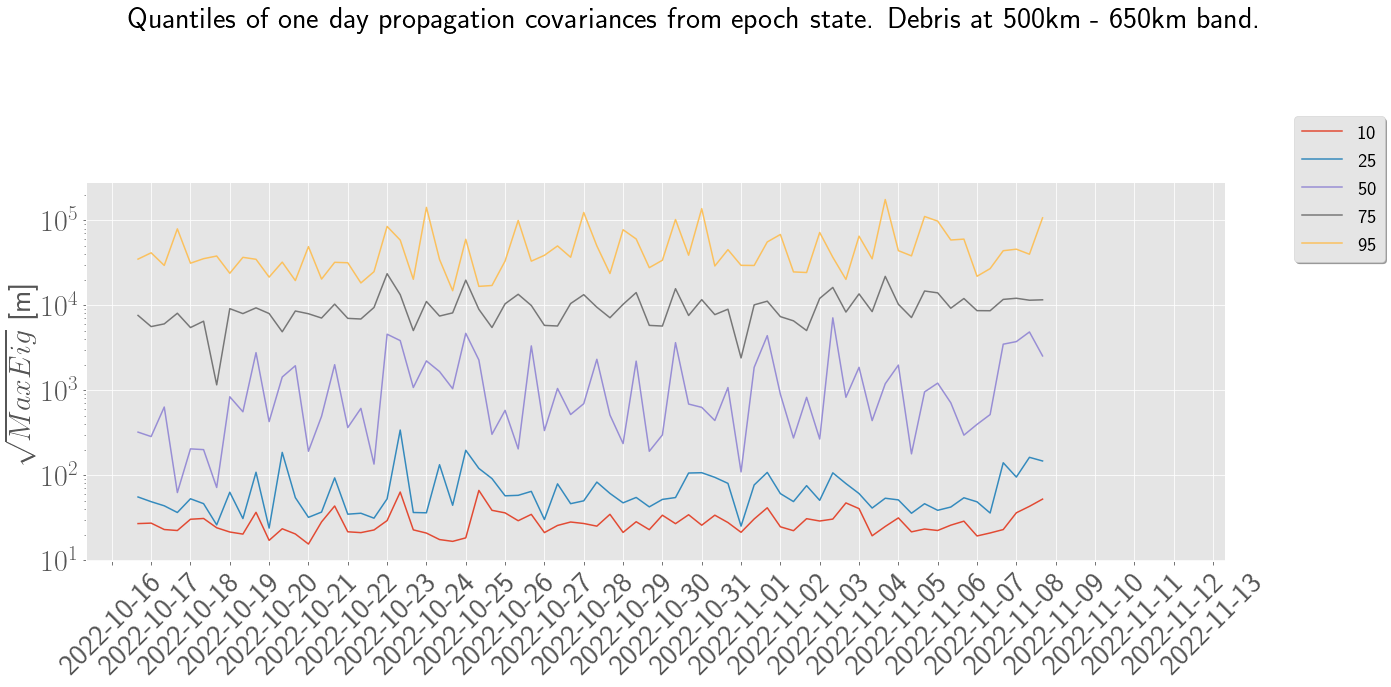

In [134]:
fig,(ax1) = plt.subplots(1,1,figsize=(20,10))

fig.suptitle("Quantiles of one day propagation covariances from epoch state. Debris at 500km - 650km band.")

ax1.plot(xs,np.sqrt(pre1d110),label="10")
ax1.plot(xs,np.sqrt(pre1d125),label="25")
ax1.plot(xs,np.sqrt(pre1d150),label="50")
ax1.plot(xs,np.sqrt(pre1d175),label="75")
ax1.plot(xs,np.sqrt(pre1d195),label="95")
ax1.set_yscale('log')
ax1.set_ylabel(r'$\sqrt{Max Eig}$ [m]')

ax1.xaxis.set_ticks(x_t[0:-1:3])
ax1.xaxis.set_ticklabels(x_major_ticks_labels)
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax1.legend(loc='upper center', bbox_to_anchor=(1.1, 1.2),
          fancybox=True, shadow=True,prop={'size': 20})

plt.tight_layout()
plt.show()

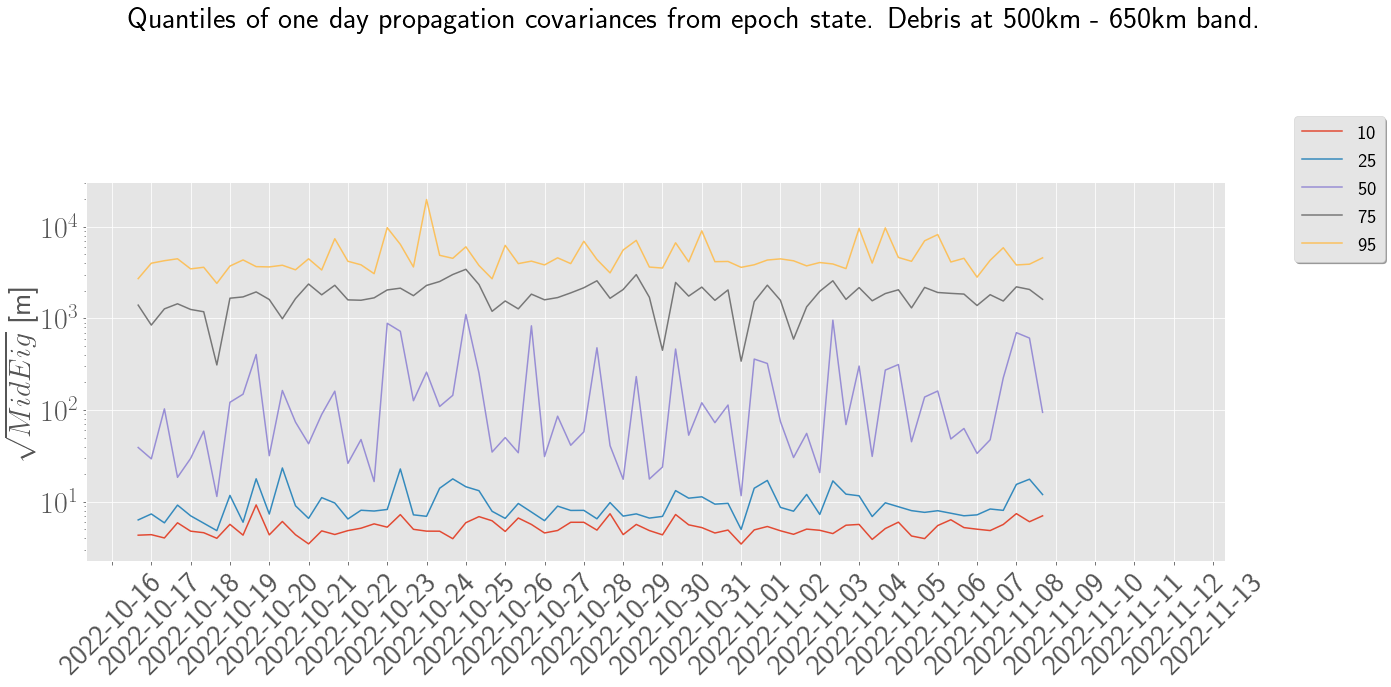

In [135]:
fig,(ax1) = plt.subplots(1,1,figsize=(20,10))

fig.suptitle("Quantiles of one day propagation covariances from epoch state. Debris at 500km - 650km band.")

ax1.plot(xs,np.sqrt(pre2d110),label="10")
ax1.plot(xs,np.sqrt(pre2d125),label="25")
ax1.plot(xs,np.sqrt(pre2d150),label="50")
ax1.plot(xs,np.sqrt(pre2d175),label="75")
ax1.plot(xs,np.sqrt(pre2d195),label="95")
ax1.set_yscale('log')
ax1.set_ylabel(r'$\sqrt{Mid Eig}$ [m]')

ax1.xaxis.set_ticks(x_t[0:-1:3])
ax1.xaxis.set_ticklabels(x_major_ticks_labels)
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax1.legend(loc='upper center', bbox_to_anchor=(1.1, 1.2),
          fancybox=True, shadow=True,prop={'size': 20})

plt.tight_layout()
plt.show()

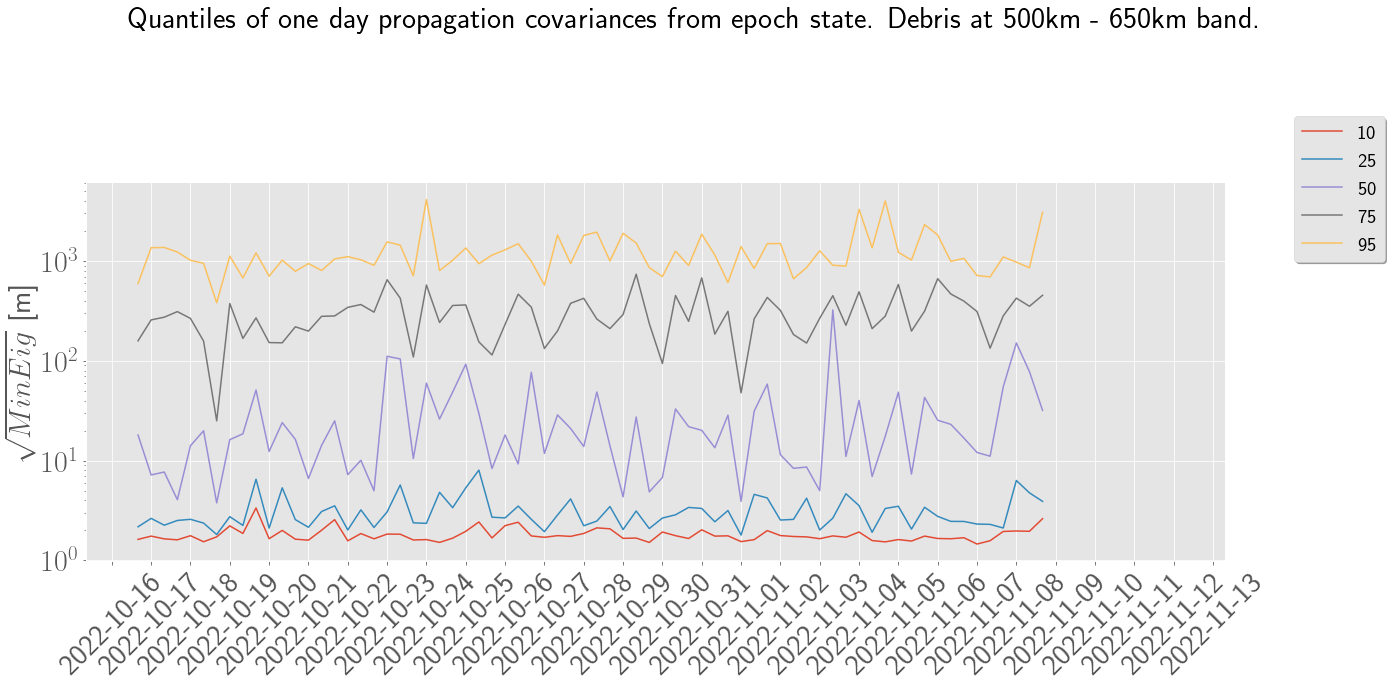

In [136]:
fig,(ax1) = plt.subplots(1,1,figsize=(20,10))

fig.suptitle("Quantiles of one day propagation covariances from epoch state. Debris at 500km - 650km band.")

ax1.plot(xs,np.sqrt(pre3d110),label="10")
ax1.plot(xs,np.sqrt(pre3d125),label="25")
ax1.plot(xs,np.sqrt(pre3d150),label="50")
ax1.plot(xs,np.sqrt(pre3d175),label="75")
ax1.plot(xs,np.sqrt(pre3d195),label="95")
ax1.set_yscale('log')
ax1.set_ylabel(r'$\sqrt{Min Eig}$ [m]')

ax1.xaxis.set_ticks(x_t[0:-1:3])
ax1.xaxis.set_ticklabels(x_major_ticks_labels)
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax1.legend(loc='upper center', bbox_to_anchor=(1.1, 1.2),
          fancybox=True, shadow=True,prop={'size': 20})

plt.tight_layout()
plt.show()

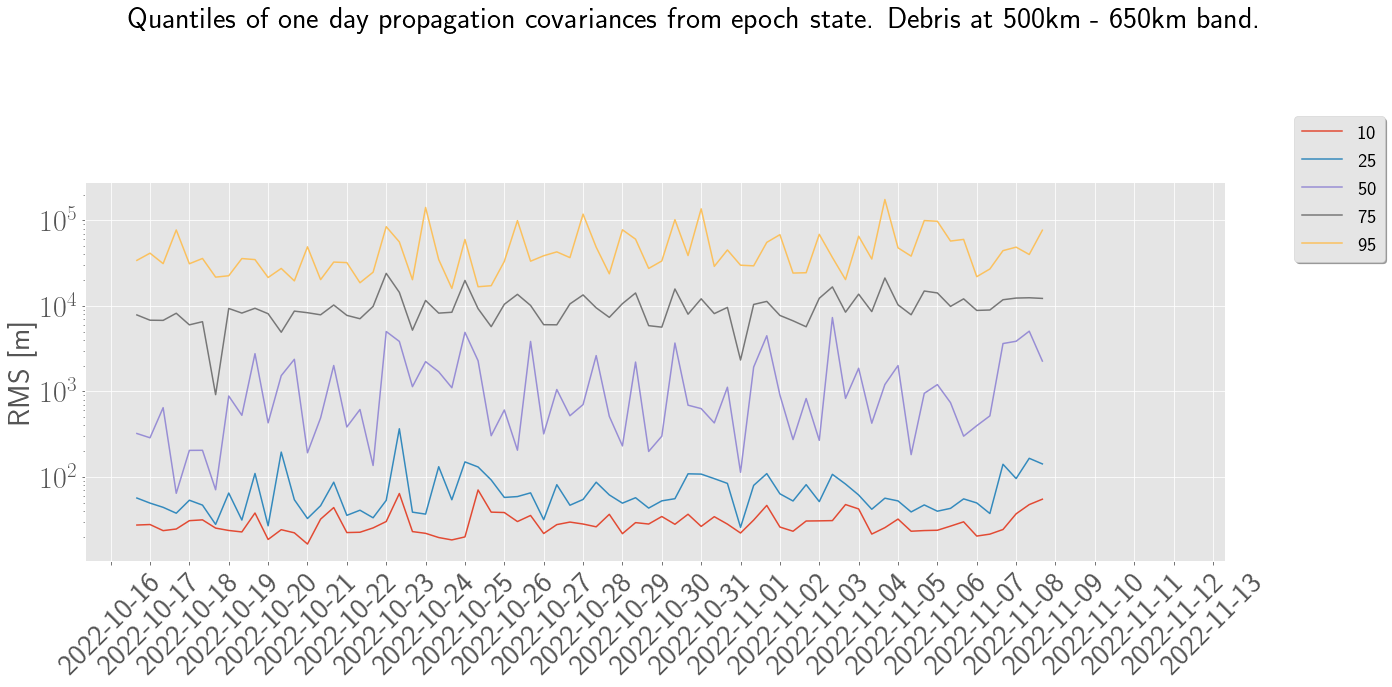

In [137]:
fig,(ax1) = plt.subplots(1,1,figsize=(20,10))

fig.suptitle("Quantiles of one day propagation covariances from epoch state. Debris at 500km - 650km band.")

ax1.plot(xs,prd1rms10,label="10")
ax1.plot(xs,prd1rms25,label="25")
ax1.plot(xs,prd1rms50,label="50")
ax1.plot(xs,prd1rms75,label="75")
ax1.plot(xs,prd1rms95,label="95")
ax1.set_yscale('log')
ax1.set_ylabel(r'RMS [m]')

ax1.xaxis.set_ticks(x_t[0:-1:3])
ax1.xaxis.set_ticklabels(x_major_ticks_labels)
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax1.legend(loc='upper center', bbox_to_anchor=(1.1, 1.2),
          fancybox=True, shadow=True,prop={'size': 20})

plt.tight_layout()
plt.show()

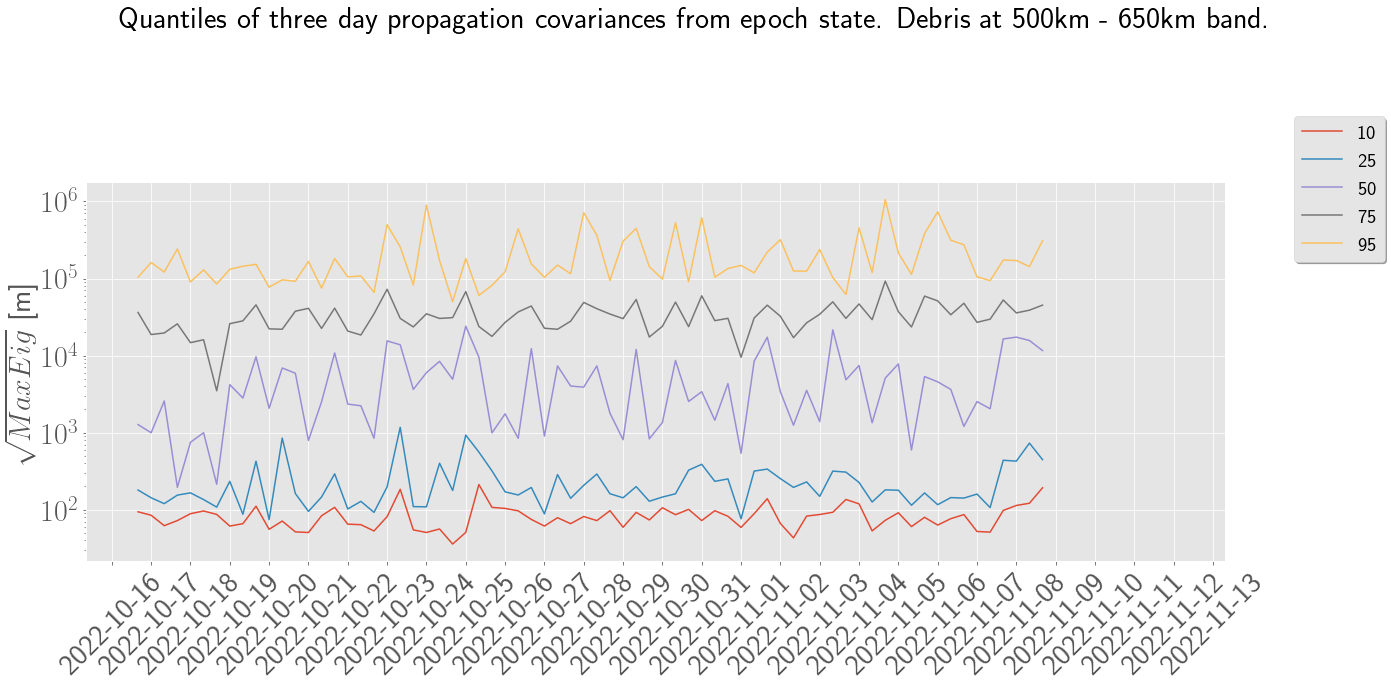

In [138]:
fig,(ax1) = plt.subplots(1,1,figsize=(20,10))

fig.suptitle("Quantiles of three day propagation covariances from epoch state. Debris at 500km - 650km band.")

ax1.plot(xs,np.sqrt(pre1d310),label="10")
ax1.plot(xs,np.sqrt(pre1d325),label="25")
ax1.plot(xs,np.sqrt(pre1d350),label="50")
ax1.plot(xs,np.sqrt(pre1d375),label="75")
ax1.plot(xs,np.sqrt(pre1d395),label="95")
ax1.set_yscale('log')
ax1.set_ylabel(r'$\sqrt{Max Eig}$ [m]')

ax1.xaxis.set_ticks(x_t[0:-1:3])
ax1.xaxis.set_ticklabels(x_major_ticks_labels)
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax1.legend(loc='upper center', bbox_to_anchor=(1.1, 1.2),
          fancybox=True, shadow=True,prop={'size': 20})

plt.tight_layout()
plt.show()

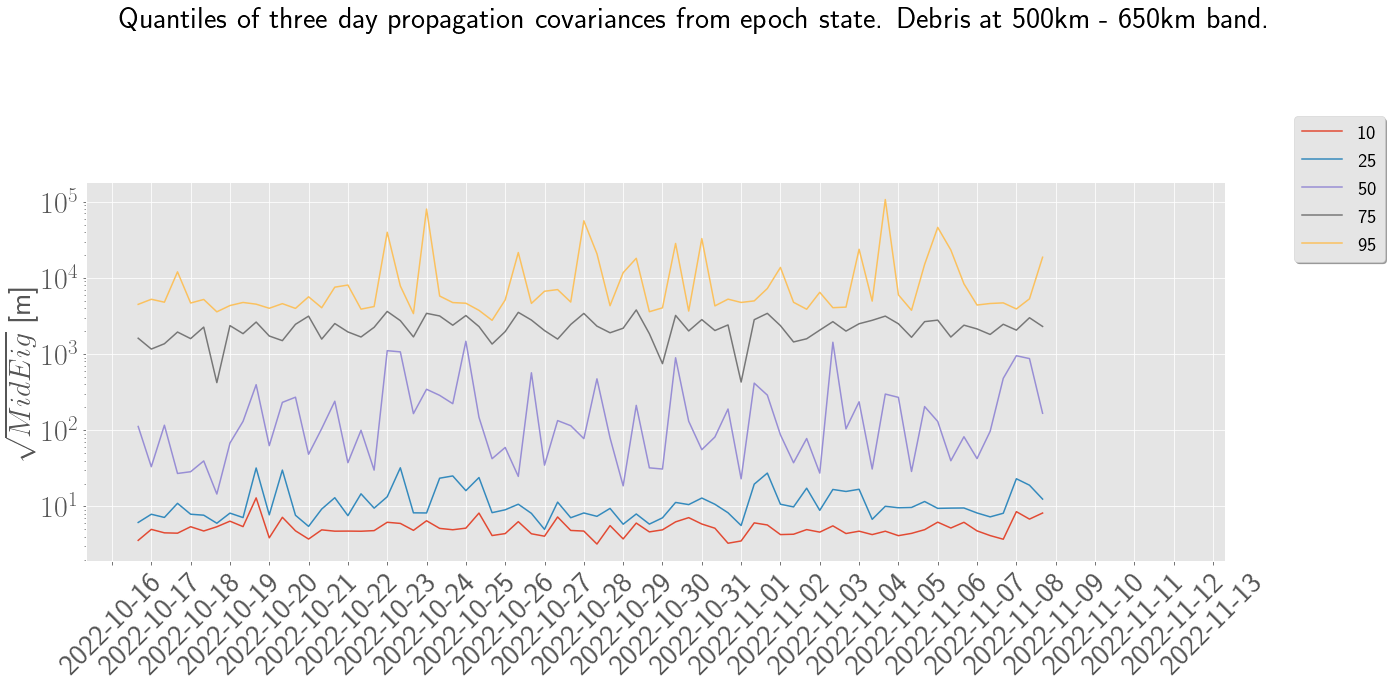

In [139]:
fig,(ax1) = plt.subplots(1,1,figsize=(20,10))

fig.suptitle("Quantiles of three day propagation covariances from epoch state. Debris at 500km - 650km band.")

ax1.plot(xs,np.sqrt(pre2d310),label="10")
ax1.plot(xs,np.sqrt(pre2d325),label="25")
ax1.plot(xs,np.sqrt(pre2d350),label="50")
ax1.plot(xs,np.sqrt(pre2d375),label="75")
ax1.plot(xs,np.sqrt(pre2d395),label="95")
ax1.set_yscale('log')
ax1.set_ylabel(r'$\sqrt{Mid Eig}$ [m]')

ax1.xaxis.set_ticks(x_t[0:-1:3])
ax1.xaxis.set_ticklabels(x_major_ticks_labels)
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax1.legend(loc='upper center', bbox_to_anchor=(1.1, 1.2),
          fancybox=True, shadow=True,prop={'size': 20})

plt.tight_layout()
plt.show()

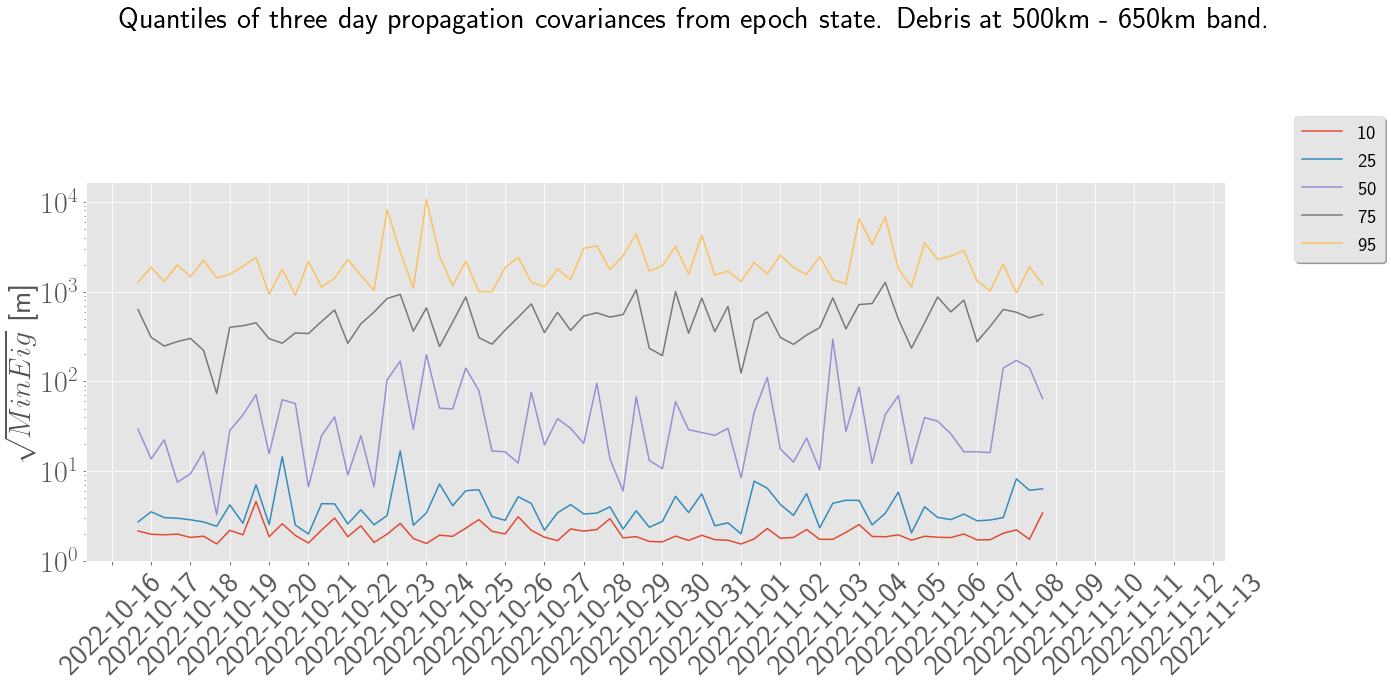

In [140]:
fig,(ax1) = plt.subplots(1,1,figsize=(20,10))

fig.suptitle("Quantiles of three day propagation covariances from epoch state. Debris at 500km - 650km band.")

ax1.plot(xs,np.sqrt(pre3d310),label="10")
ax1.plot(xs,np.sqrt(pre3d325),label="25")
ax1.plot(xs,np.sqrt(pre3d350),label="50")
ax1.plot(xs,np.sqrt(pre3d375),label="75")
ax1.plot(xs,np.sqrt(pre3d395),label="95")
ax1.set_yscale('log')
ax1.set_ylabel(r'$\sqrt{Min Eig}$ [m]')

ax1.xaxis.set_ticks(x_t[0:-1:3])
ax1.xaxis.set_ticklabels(x_major_ticks_labels)
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax1.legend(loc='upper center', bbox_to_anchor=(1.1, 1.2),
          fancybox=True, shadow=True,prop={'size': 20})

plt.tight_layout()
plt.show()

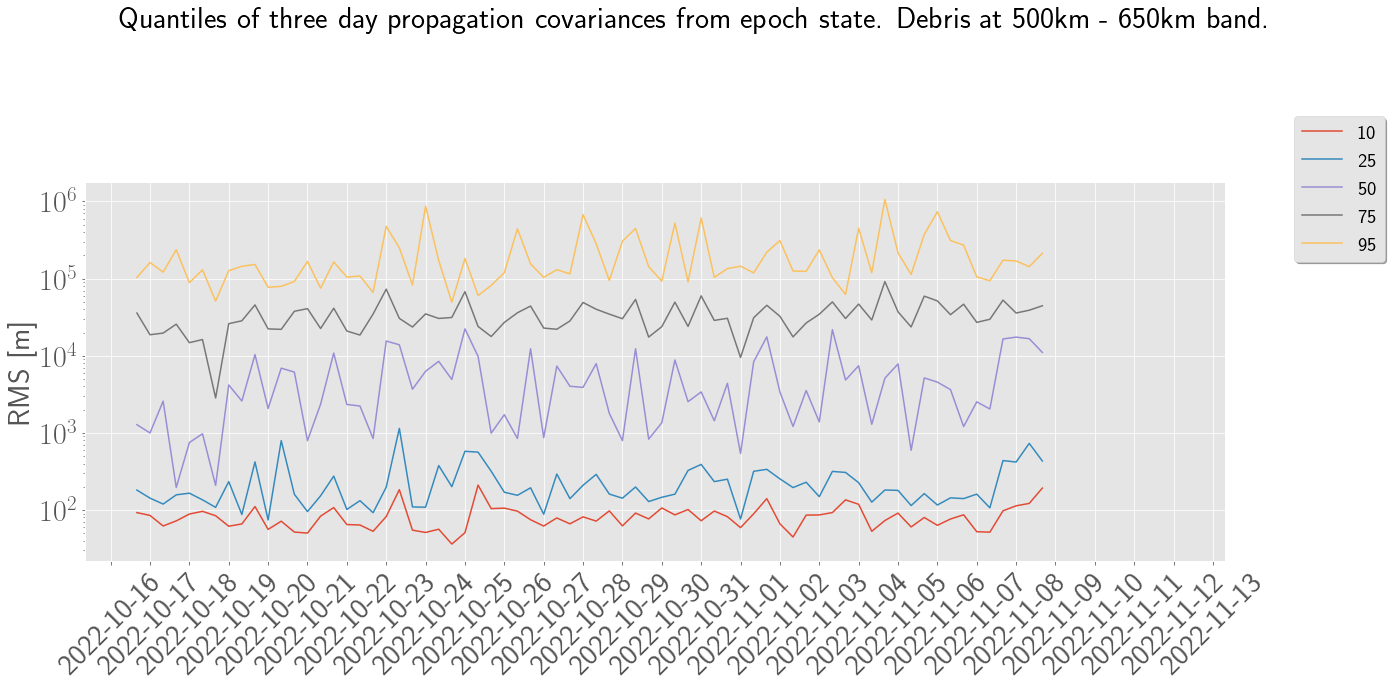

In [141]:
fig,(ax1) = plt.subplots(1,1,figsize=(20,10))

fig.suptitle("Quantiles of three day propagation covariances from epoch state. Debris at 500km - 650km band.")

ax1.plot(xs,prd3rms10,label="10")
ax1.plot(xs,prd3rms25,label="25")
ax1.plot(xs,prd3rms50,label="50")
ax1.plot(xs,prd3rms75,label="75")
ax1.plot(xs,prd3rms95,label="95")
ax1.set_yscale('log')
ax1.set_ylabel(r'RMS [m]')

ax1.xaxis.set_ticks(x_t[0:-1:3])
ax1.xaxis.set_ticklabels(x_major_ticks_labels)
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax1.legend(loc='upper center', bbox_to_anchor=(1.1, 1.2),
          fancybox=True, shadow=True,prop={'size': 20})

plt.tight_layout()
plt.show()